In [38]:
import pandas as pd

filepath = "../data/digester_data.csv"
dataset = pd.read_csv(filepath, index_col=0, parse_dates=True)
dataset.describe()

,Wash Filtrate to Digester - Total Flow,Wash Filtrate Vertical Nozzle,White Liquor Flow to ITC,H-factor,H-factor Co-Current,H-factor Target,H-factor Counter-Current,Volumetric Chip Flow,Chip Mass Flow from Piles,Spruce Saw Mill Chips Share,...,Hot Spent Digester Liquor Specific Flow to Impregnation Vessel,Digester Production,Digester Long Level,Digester Chip Level Control,Digester Dilution Factor,Digester Short Level,Blow Kappa,Blow Temperature,Blow Production,Weak Black Liquor to Evaporation Plant Residual Alkali
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,...,5968.000000,5.968000e+03,5968.000000,5.968000e+03,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,152.684728,136.377225,0.805236,570.977032,301.579641,570.424631,269.397390,648.486237,36.875105,8.321328,...,2.699426,1.131095e+03,88.548976,1.821106e+01,2.180605,48.323078,27.805850,87.668116,1192.618513,10.258447
std,16.048149,13.919758,0.065796,44.603387,23.764770,42.663694,23.083611,151.769241,4.564046,13.778885,...,0.024933,9.648935e+01,0.389135,1.198734e+01,0.077165,0.930924,1.542807,1.430514,110.261327,0.886624
min,74.308880,67.062810,0.247412,481.332200,238.832000,510.000000,218.241900,0.287224,0.000000,0.000000,...,1.557932,2.920000e-24,85.750780,8.270000e-44,0.562290,38.517540,22.170250,78.215330,617.716000,8.920000
25%,150.227000,134.500125,0.812160,533.705400,281.981575,530.000000,251.153225,657.000750,34.966920,0.000000,...,2.700000,1.159972e+03,88.269143,9.788168e+00,2.112270,47.825635,26.894120,86.934745,1173.334500,9.410000
50%,155.692000,139.346850,0.821603,559.434800,293.838550,550.000000,265.667550,690.155350,37.225650,0.000000,...,2.700000,1.164592e+03,88.548210,1.743239e+01,2.192728,48.213135,27.760630,87.685415,1214.454500,10.190000
75%,161.757025,143.924075,0.833718,609.275650,321.322500,600.000000,287.128975,711.669425,40.014853,14.973385,...,2.700000,1.165070e+03,88.808513,2.506831e+01,2.244194,48.771113,28.699717,88.671003,1251.014500,11.080000
max,190.484000,170.756900,0.912871,732.269400,376.860700,670.000000,364.774900,865.293400,48.994150,50.678790,...,2.800951,1.195267e+03,93.199450,1.015897e+02,2.727024,66.054000,33.682950,90.681490,1500.449000,11.370000


In [39]:
# data = dataset.rolling(window=10)
# print(data.info())

In [40]:
y_data = dataset['Blow Kappa'].to_numpy()
X_data = dataset.drop(['Blow Kappa'], axis=1).to_numpy()
print(y_data.shape)
print(X_data.shape)

(5968,)
(5968, 36)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(X_data)
X_data = sc.fit_transform(X_data)
print(X_data)


[[1.102245e+02 9.917144e+01 6.660820e-01 ... 8.131033e+01 9.443789e+02
  9.080000e+00]
 [1.101122e+02 9.894392e+01 6.641360e-01 ... 8.129632e+01 9.351744e+02
  9.080000e+00]
 [1.105644e+02 9.935569e+01 6.633860e-01 ... 8.133907e+01 9.435457e+02
  9.080000e+00]
 ...
 [8.365789e+01 7.565310e+01 5.010170e-01 ... 8.579716e+01 7.315477e+02
  1.137000e+01]
 [8.097505e+01 7.283858e+01 4.681560e-01 ... 8.574205e+01 7.109967e+02
  1.137000e+01]
 [8.526036e+01 7.645451e+01 4.670410e-01 ... 8.566444e+01 7.450074e+02
  1.137000e+01]]
[[-2.64602386 -2.67309972 -2.11511516 ... -4.44478022 -2.25156381
  -1.3292499 ]
 [-2.65302214 -2.6894462  -2.14469408 ... -4.45457472 -2.33504975
  -1.3292499 ]
 [-2.62484207 -2.65986203 -2.15609397 ... -4.42468785 -2.25912103
  -1.3292499 ]
 ...
 [-4.30159398 -4.36280653 -4.62407945 ... -1.30800051 -4.18196895
   1.25379626]
 [-4.46878241 -4.56501951 -5.12356193 ... -1.34652836 -4.36836905
   1.25379626]
 [-4.20173173 -4.30522815 -5.14050977 ... -1.40078615 -4.05988

In [42]:
#Split des données en train et test

y_train = y_data[:int(len(y_data)*0.8)]
y_test = y_data[int(len(y_data)*0.8):]
X_train = X_data[:int(len(X_data)*0.8)]
X_test = X_data[int(len(X_data)*0.8):]

print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)


(4774,) (1194,)
(4774, 36) (1194, 36)


In [43]:
import keras
import tensorflow as tf

batch_size = 256
step = 10
sequence_length = 10

dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

dataset_test = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

for batch in dataset_train.take(1):
    inputs, targets = batch

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 36)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8832      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,865
Trainable params: 8,865
Non-trainable params: 0
_________________________________________________________________


In [55]:

model.compile(
    optimizer='RMSprop',
    loss='mse',
    metrics=['mse'],
)

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_test, 
    callbacks=[es_callback, modelckpt_callback],
)


Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 755.6129 - mse: 755.6129
Epoch 1: val_loss improved from inf to 759.51233, saving model to model_checkpoint.h5
19/19 [==============================] - 11s 125ms/step - loss: 755.6129 - mse: 755.6129 - val_loss: 759.5123 - val_mse: 759.5123
Epoch 2/10
17/19 [=========================>....] - ETA: 0s - loss: 708.8638 - mse: 708.8638
Epoch 2: val_loss improved from 759.51233 to 742.96246, saving model to model_checkpoint.h5
19/19 [==============================] - 1s 60ms/step - loss: 709.8580 - mse: 709.8580 - val_loss: 742.9625 - val_mse: 742.9625
Epoch 3/10
18/19 [===========================>..] - ETA: 0s - loss: 656.9931 - mse: 656.9931
Epoch 3: val_loss improved from 742.96246 to 713.62299, saving model to model_checkpoint.h5
19/19 [==============================] - 1s 77ms/step - loss: 657.8619 - mse: 657.8619 - val_loss: 713.6230 - val_mse: 713.6230
Epoch 4/10
18/19 [===========================>..] - ETA: 0s - los

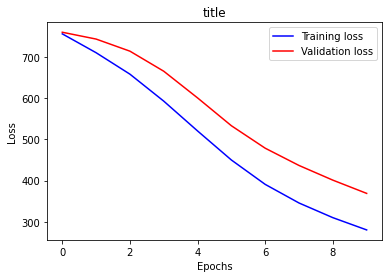

In [56]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("title")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


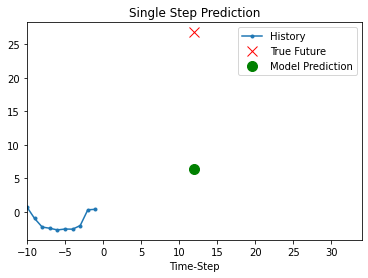

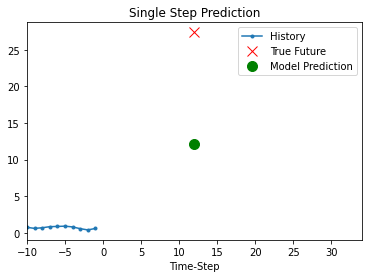

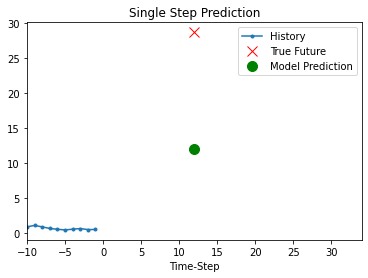

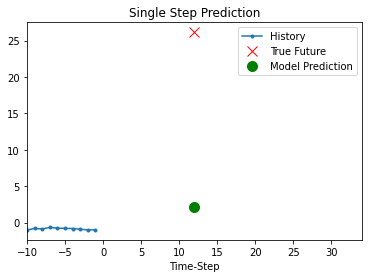

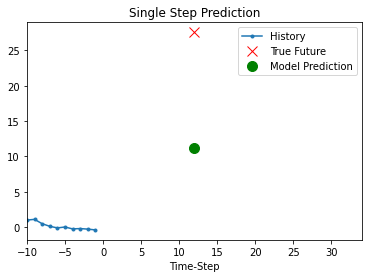

In [57]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i],
                     markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(
            ), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_test.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )
